In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Dataset Info 
# 1- Student Age (1: 18-21, 2: 22-25, 3: above 26)
# 2- Sex (1: female, 2: male)
# 3- Graduated high-school type: (1: private, 2: state, 3: other)
# 4- Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)
# 5- Additional work: (1: Yes, 2: No)
# 6- Regular artistic or sports activity: (1: Yes, 2: No)
# 7- Do you have a partner: (1: Yes, 2: No)
# 8- Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)
# 9- Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)
# 10- Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)
# 11- Mothersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
# 12- Fathersâ€™ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
# 13- Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
# 14- Parental status: (1: married, 2: divorced, 3: died - one of them or both)
# 15- Mothersâ€™ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
# 16- Fathersâ€™ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)
# 17- Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)
# 18- Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)
# 19- Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)
# 20- Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)
# 21- Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)
# 22- Attendance to classes (1: always, 2: sometimes, 3: never)
# 23- Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)
# 24- Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)
# 25- Taking notes in classes: (1: never, 2: sometimes, 3: always)
# 26- Listening in classes: (1: never, 2: sometimes, 3: always)
# 27- Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)
# 28- Flip-classroom: (1: not useful, 2: useful, 3: not applicable)
# 29- Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
# 30- Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)
# 31- Course ID
# 32- OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)

data_set = pd.read_csv('StudentsPerformance_with_headers.csv')
df = data_set.copy()
#dropping course ID and student ID because they are not relevant
df.drop('COURSE ID', axis=1, inplace=True)
df.drop('STUDENT ID', axis=1, inplace=True)
df

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,1,2,1,2,1,3,3,5
141,1,1,2,4,2,2,2,1,4,2,...,2,1,1,3,2,2,1,5,3,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,1,3,3,2,1,4,3,1
143,2,1,2,4,1,1,1,5,2,3,...,1,2,1,2,1,2,1,5,3,4


In [2]:
df.describe()

,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accommodation type in Cyprus,...,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.241379,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.429403,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,7.000000


In [3]:
numeric_df = df.select_dtypes(include=['number']).dropna()
# numeric_df = one_hot_df.select_dtypes(include=['number']).dropna()

X = numeric_df.drop('GRADE', axis=1)  
y = numeric_df['GRADE']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100,random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
#try pearson correlation try other eval metrics
#kde plot for showing accuracy
#split data by men and women run model on subsets, see what variables are best for each sex
#test different regresion models

feature_importances = rf_regressor.feature_importances_
feature_importances #labels

Root Mean Squared Error (RMSE): 2.0724562721563027


array([0.04971498, 0.09411531, 0.02074692, 0.03357374, 0.01806926,
       0.04465587, 0.01243663, 0.0365131 , 0.02610578, 0.02953584,
       0.04635948, 0.05886568, 0.04330906, 0.00797819, 0.03632388,
       0.03159277, 0.0286676 , 0.04192232, 0.01725066, 0.0099289 ,
       0.01646121, 0.01383952, 0.0320305 , 0.00811249, 0.02163786,
       0.02099581, 0.01337934, 0.05280177, 0.10986829, 0.02320722])

In [4]:
#Random Forest Regressor Run
print("Random Forest Regressor Model")
numeric_df = df.select_dtypes(include=['number']).dropna()

X = numeric_df.drop('GRADE', axis=1)  
y = numeric_df['GRADE']  

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestRegressor instance
rf_regressor = RandomForestRegressor(n_estimators=10000, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")

# Calculate Pearson correlation between each feature and the target variable
correlations = []
for col in X.columns:
    correlation, _ = pearsonr(X[col], y)
    correlations.append((col, correlation))

# Print Pearson correlations
print("Pearson Correlations:")
for col, correlation in sorted(correlations, key=lambda x: abs(x[1]), reverse=True):
    print(f"{col}: {correlation:.4f}")

# Print feature importances
feature_importances = rf_regressor.feature_importances_
print("\nFeature Importances:")
for col, importance in sorted(zip(X.columns, feature_importances), key=lambda x: x[1], reverse=True):
    print(f"{col}: {importance:.4f}")

Random Forest Regressor Model

Root Mean Squared Error (RMSE): 2.057179366323528
Pearson Correlations:
Sex: 0.3355
Cumulative grade point average in the last semester (/4.00): 0.3155
Expected Cumulative grade point average in the graduation (/4.00): 0.2486
Impact of your projects/activities on your success: -0.2033
Reading frequency: 0.1956
Attendance to the seminars/conferences related to the department: -0.1848
Additional work: 0.1674
Total salary if available: -0.1664
Transportation to the university: -0.1563
Discussion improves my interest and success in the course: 0.1465
Attendance to classes: -0.1396
Flip-classroom: 0.1106
Graduated high-school type: 0.1048
Student Age: -0.0953
Listening in classes: 0.0851
Number of sisters/brothers: 0.0845
Preparation to midterm exams 2: 0.0738
Parental status: 0.0664
Mother’s education: 0.0663
Father’s education : 0.0635
Regular artistic or sports activity: -0.0630
Do you have a partner: -0.0518
Taking notes in classes: 0.0449
Father’s occupat

In [5]:
# Random Forest Classifier run
print("Random Forest Classier Model")

columns_to_keep = ['Sex', 'Cumulative grade point average in the last semester (/4.00)', 'Expected Cumulative grade point average in the graduation (/4.00)', 'Reading frequency', 'Attendance to classes', 'Weekly study hours', 'GRADE']

# Create a copy of the DataFrame with fewer columns. checking to help accuracy rating 
subset_df = df.copy()[columns_to_keep]

X = subset_df.drop(columns=['GRADE'], axis=1)  
y = subset_df['GRADE']

#Using all columns
# numeric_df = df.select_dtypes(include=['number']).dropna()

# X = numeric_df.drop('GRADE', axis=1)  
# y = numeric_df['GRADE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestRegressor instance
rf_classifier = RandomForestClassifier(n_estimators=2000, random_state=42)

#try max depth for tree to help accuracy, find more parameters for rf 

#Train
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Obtain feature importances
feature_importances = rf_classifier.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

Random Forest Classier Model
Accuracy: 0.2273

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.32      0.60      0.41        10
           2       1.00      0.11      0.20         9
           3       0.33      0.17      0.22         6
           4       0.00      0.00      0.00         3
           5       0.17      0.33      0.22         3
           6       0.00      0.00      0.00         5
           7       0.14      0.33      0.20         3

    accuracy                           0.23        44
   macro avg       0.24      0.19      0.16        44
weighted avg       0.34      0.23      0.19        44


Confusion Matrix:
[[0 3 0 0 0 0 2 0]
 [1 6 0 0 0 0 0 3]
 [2 3 1 0 2 1 0 0]
 [0 2 0 1 1 2 0 0]
 [0 1 0 0 0 1 0 1]
 [0 2 0 0 0 1 0 0]
 [0 1 0 1 0 1 0 2]
 [0 1 0 1 0 0 0 1]]
Sex: 0.0862
Cumulative grade point average in the last semester (/4.00): 0.2642
Expected Cumulative grade p

Linear Regression Model
[[-1.48079028  0.93771833  0.74659434 -0.58378906  0.84775627 -0.36573929
   0.13980319 -0.11248017 -0.15912954  0.2079258   0.2727421   0.1041141
   0.391525    0.74899741  0.19388437 -0.39113106 -0.45060557  1.24537893
  -0.14152483 -0.01804314 -0.34131675 -0.30479416  0.82220292  0.77401756
  -0.61288551  0.67558903  0.34872312  0.40614421  0.62056261 -0.07724027]]
Index(['Student Age', 'Sex', 'Graduated high-school type', 'Scholarship type',
       'Additional work', 'Regular artistic or sports activity',
       'Do you have a partner', 'Total salary if available',
       'Transportation to the university', 'Accommodation type in Cyprus',
       'Mother’s education', 'Father’s education ',
       'Number of sisters/brothers', 'Parental status', 'Mother’s occupation',
       'Father’s occupation', 'Weekly study hours', 'Reading frequency',
       'Reading frequency.1',
       'Attendance to the seminars/conferences related to the department',
       'Impact o

,True Grades,Predicted Grades
69,5,0.795585
140,5,1.608887
27,1,0.399065
19,3,1.860659
42,1,3.636620
117,1,-0.216083
126,3,2.236299
108,6,0.939197
84,7,10.908561
18,2,2.186285



Root Mean Squared Error (RMSE): 2.9273302575726707
R-squared (R2): -0.8801
0.2169166873549887 0.1572609266720037


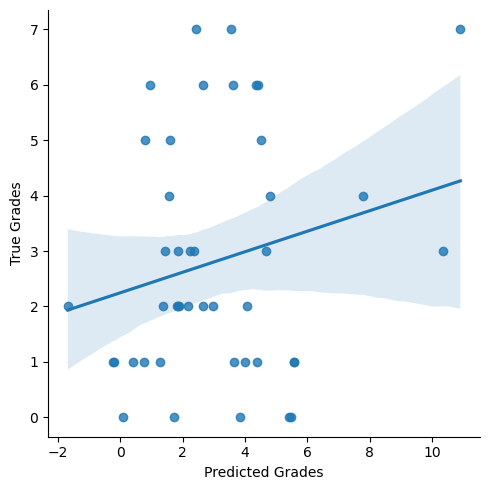

In [11]:
#Linear regression run
print("Linear Regression Model")

numeric_df = df.select_dtypes(include=['number']).dropna()

# Extract the target variable (y)
y = numeric_df[['GRADE']]

# Extract features (X) by excluding the target column
X = numeric_df.drop(columns=['GRADE'])

# X = numeric_df.drop('GRADE', axis=1)  
# y = numeric_df['GRADE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a linear regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test)
print(linear_reg_model.coef_)
print(X_train.columns)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# print(X_test.shape)
# print(y_test.shape)
# print(y_pred.shape)

# a, b = np.polyfit(list(y_pred.astype(float)), list(y_test.astype(float)), 1)
y_pred_df = pd.DataFrame()
y_pred_df["True Grades"] = y_test
y_pred_df["Predicted Grades"] = y_pred
display(y_pred_df) #showing the impact of each feature on the linear regression, similar to feature importance in other models

correlation, pv = pearsonr(y_pred_df["True Grades"], y_pred_df["Predicted Grades"])
print(f"\nRoot Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2:.4f}")
print(correlation, pv)

sns.lmplot(data=y_pred_df, x="Predicted Grades", y="True Grades")
plt.show()